In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
corolla = pd.read_csv("F:\\PYTHON\\ASSIGNMENTS\\Multilinear Regression\\Assignments\\ToyotaCorolla.csv")

In [3]:
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
corolla_new = corolla.to_csv("F:\\PYTHON\\ASSIGNMENTS\\Multilinear Regression\\Assignments\\Toyota.csv" , columns= ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"], index=False)
# Writing to new csv file with only required data set

In [5]:
Toyota_c = pd.read_csv("F:\\PYTHON\\ASSIGNMENTS\\Multilinear Regression\\Assignments\\Toyota.csv")

In [6]:
Toyota_c.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
Toyota_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [8]:
Toyota_c['Doors'].unique() # Datatype can be change to categorical.

array([3, 5, 4, 2], dtype=int64)

In [9]:
Toyota_c['Doors'] = Toyota_c['Doors'].astype('category')

In [10]:
Toyota_c[Toyota_c["KM"]<10] # KM =1 can be wrong data or new car , proceeding by considering them as new cars.

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
117,17900,7,1,110,1600,3,5,85,1105
169,17795,9,1,98,1400,4,5,19,1065
170,18245,9,1,110,1600,5,5,19,1075
184,17795,1,1,98,1400,4,5,19,1100
185,18245,1,1,110,1600,5,5,19,1075
601,7500,50,1,90,2000,3,5,64,1260
1435,6950,76,1,110,1600,5,5,19,1114


In [11]:
Toyota_c.describe()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,6.000000,283.000000,1615.00000


In [12]:
Toyota_c[Toyota_c["cc"]> 2000] # cc = 16000 is not possible , rewrinting it to 1600.

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [13]:
Toyota_c['cc'] = Toyota_c['cc'].replace(16000 , 1600) # replacing 16000 with 1600

In [14]:
Toyota_c[Toyota_c.duplicated()] # Checking of duplicates.

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
Toyota_c = Toyota_c.drop_duplicates().reset_index() # Removing duplicated row.

In [16]:
Toyota_c.drop('index' , axis =1 , inplace = True)

(array([110., 706., 343., 114.,  75.,  59.,  22.,   3.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

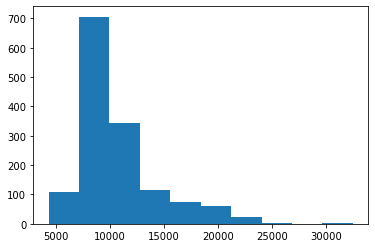

In [17]:
plt.hist(Toyota_c['Price'] , bins = 10) # data is positively skewed

{'whiskers': [<matplotlib.lines.Line2D at 0xa1fa808>,
 'caps': [<matplotlib.lines.Line2D at 0xa1fab68>,
 'boxes': [<matplotlib.lines.Line2D at 0xa1fa658>],
 'medians': [<matplotlib.lines.Line2D at 0xa1faec8>],
 'fliers': [<matplotlib.lines.Line2D at 0xa20b0a0>],
 'means': []}

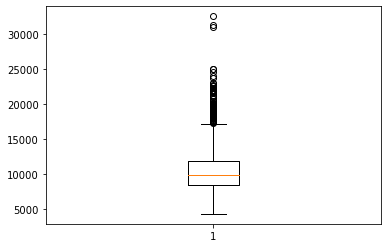

In [18]:
plt.boxplot(Toyota_c["Price"]) # indicates presence of outliers.

(array([121., 331., 417., 301., 140.,  64.,  30.,  17.,  12.,   2.]),
 array([1.000000e+00, 2.430090e+04, 4.860080e+04, 7.290070e+04,
        9.720060e+04, 1.215005e+05, 1.458004e+05, 1.701003e+05,
        1.944002e+05, 2.187001e+05, 2.430000e+05]),
 <BarContainer object of 10 artists>)

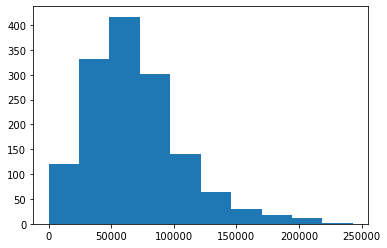

In [19]:
plt.hist(Toyota_c['KM'] , bins = 10) # data is positively skewed

{'whiskers': [<matplotlib.lines.Line2D at 0xa280580>,
 'caps': [<matplotlib.lines.Line2D at 0xa2808b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xa2803b8>],
 'medians': [<matplotlib.lines.Line2D at 0xa280c10>],
 'fliers': [<matplotlib.lines.Line2D at 0xa280dc0>],
 'means': []}

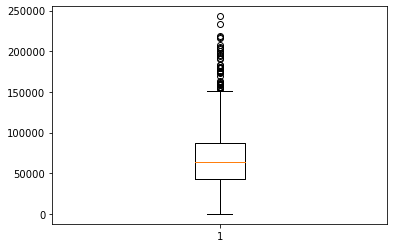

In [20]:
plt.boxplot(Toyota_c["KM"]) # indicates presence of outliers.

In [21]:
Toyota_c.corr() # checking for correlation .
# As there is not much of linear relation between input variables all variables can be considered for model building.
# Age has strong neagtive relation with Price

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.159897,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.129564,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.305331,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.049430,0.209642,-0.302287,0.087143
cc,0.159897,-0.129564,0.305331,0.049430,1.000000,0.040997,0.677765,0.650098
Gears,0.063831,-0.005629,0.014890,0.209642,0.040997,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.677765,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.650098,0.021238,0.621988,1.000000


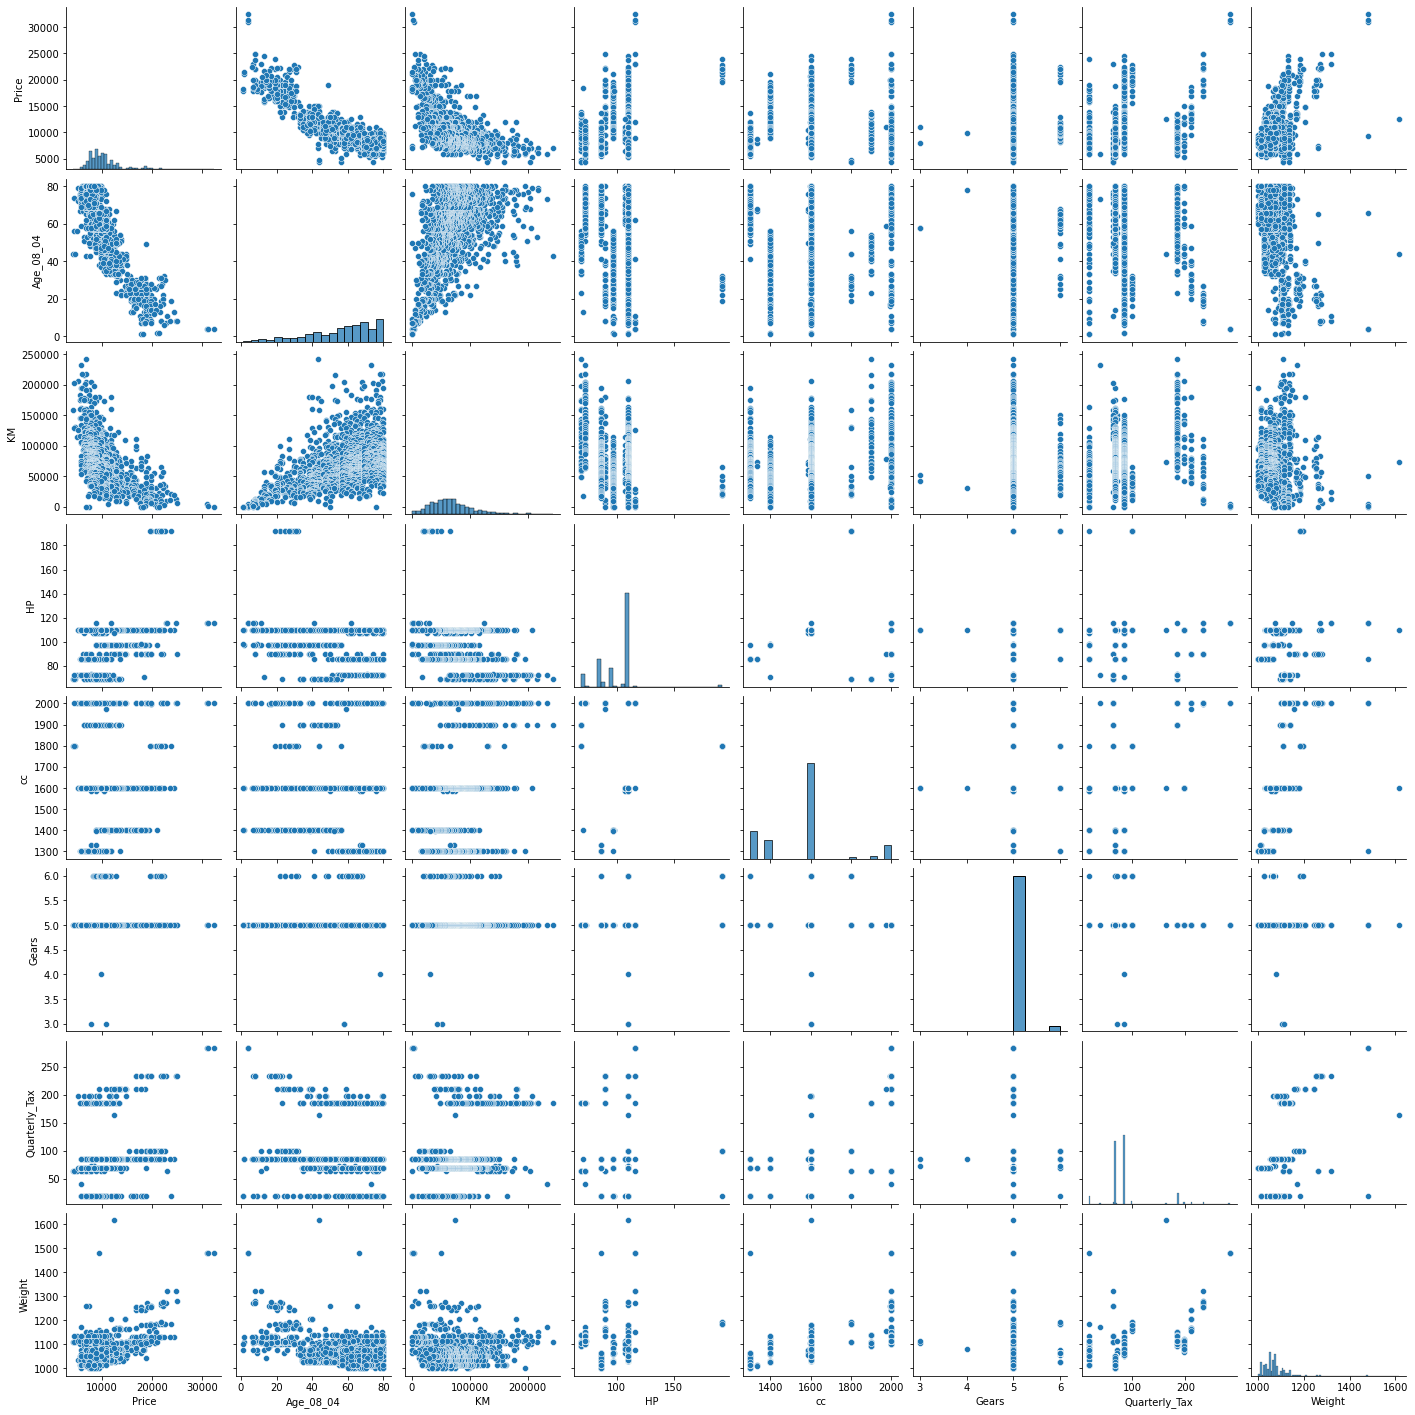

In [22]:
sns.pairplot(Toyota_c)

In [23]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight" , data = Toyota_c).fit()
model1 = model.rsquared
model.summary()
# since P values of all variables are less than .5 and rsquared values is > .85 , Model is good for predicting.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1346.
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:34:02   Log-Likelihood:                -12334.
No. Observations:                1435   AIC:                         2.468e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6263.8333   1382.293     -4.531      0.000   -8975.379   -3552.288
Age_08_04      -120.5189      2.561    -47.066      0.000    -125.542    -115.496
KM               -0.0179      0.001    -13.997      0.000      -0.020      -0.015
HP               39.0388      2.899     13.468      0.000      33.353      44.725
cc               -2.4974      0.306     -8.156      0.000      -3.098      -1.897
Gears           551.6578    189.158      2.916      0.004     180.600     922.716
Quarterly_Tax     8.9574      1.425      6.284      0.000       6.161      11.753
Weight           19.9139      1.077     18.491      0.000      17.801      22.027
==============================================================================
Omnibus:                      237.638   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2527.500
Skew:                          -0.417   Prob(JB):                         0.00
Kurtosis:                       9.448   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model1_predict = model.predict(Toyota_c) # Predicting price unsing model-1 

In [25]:
model1_RMSE = np.sqrt(np.mean((Toyota_c['Price']-model1_predict)**2)) # checking RMSE for comparing models.

In [26]:
# Improving Model.

In [27]:
#check for normality of residuals.

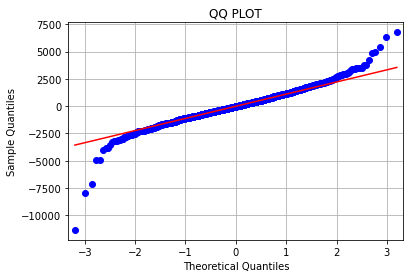

In [28]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid , line = 'q')
plt.title("QQ PLOT")
plt.grid()
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

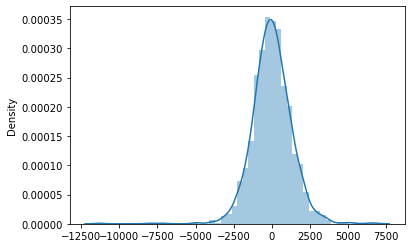

In [29]:
sns.distplot(model.resid) # Plot showing normal distribution of residuals.

In [30]:
list(np.where(model.resid < -7500)) # Checking for data points which are out of range of normal distribution.

[array([220, 959], dtype=int32)]

In [31]:
# Scatter plot to check for pattern of residual plot

In [32]:
def standardize_values(vals):
    return (vals - vals.mean())/vals.std()

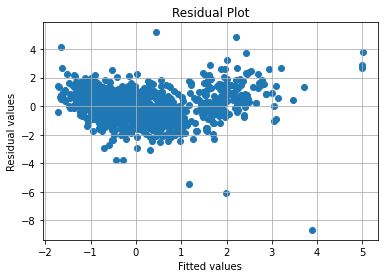

In [33]:
plt.scatter(standardize_values(model.fittedvalues) , standardize_values(model.resid))
plt.title("Residual Plot")
plt.ylabel("Residual values")
plt.xlabel("Fitted values")
plt.grid()
plt.show()
# Since there is no pattern found , erros are independent of each other.

In [34]:
# plotting cooks distance to check for influencers/outliers.

In [35]:
model_influencer = model.get_influence()
(c , _) = model_influencer.cooks_distance

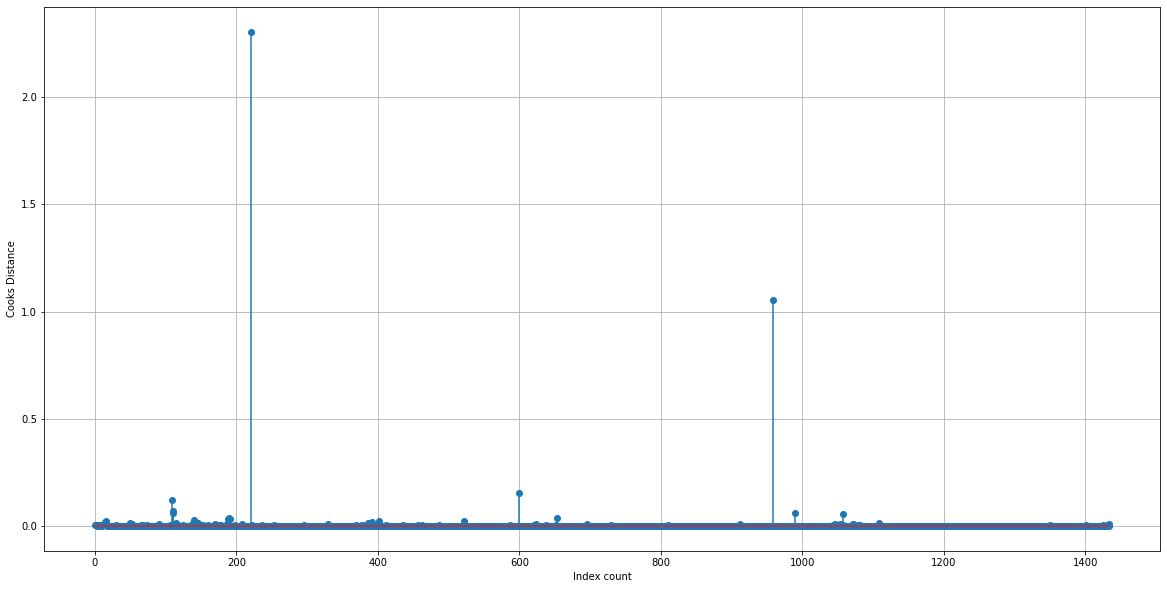

In [36]:
plt.figure(figsize= (20 , 10))
plt.stem(np.arange(len(Toyota_c)),np.round(c,3))
plt.xlabel("Index count")
plt.ylabel("Cooks Distance")
plt.grid()
plt.show()
# 2 points are found as influencers ie cooks distance > .5

In [37]:
# plotting bubble plot to check exact location 

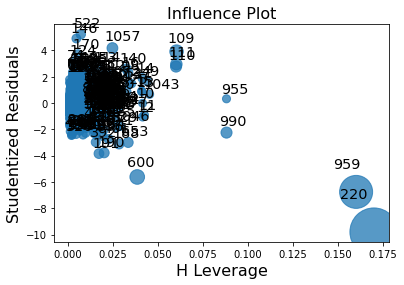

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [39]:
# Influence ponits , its can also be found out using leverange_cutoff 
Toyota_c[Toyota_c.index.isin([959,220])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480


In [40]:
Toyota_c_new = Toyota_c.drop(Toyota_c.index[[220,959]], axis = 0 ).reset_index() # dropping influence points

In [41]:
Toyota_c_new.drop('index' , axis =1 , inplace = True)

In [42]:
# Building model after eleminating otliers

In [43]:
model_new = smf.ols("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight" , data = Toyota_c_new).fit()
model2 = model_new.rsquared

In [44]:
model2_predict = model_new.predict(Toyota_c_new)

In [45]:
model2_RMSE = np.sqrt(np.mean((Toyota_c_new['Price']-model2_predict)**2)) # checking RMSE for comparing models.

In [46]:
# Again checking cooks distance for outliers.

In [47]:
model_influencer_new = model_new.get_influence()
(c_new , _) = model_influencer_new.cooks_distance

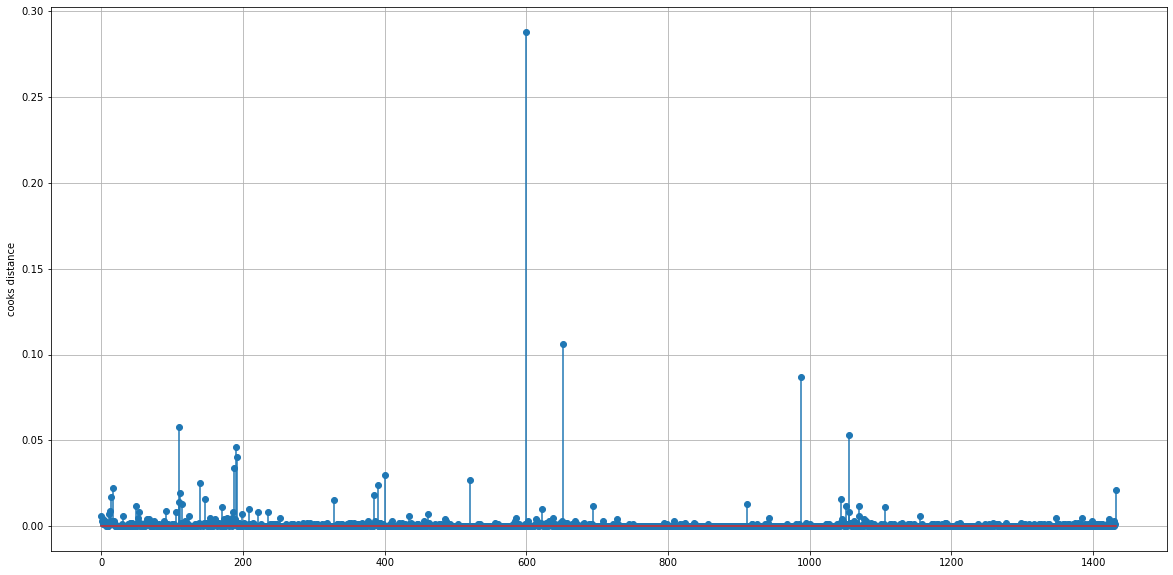

In [48]:
plt.figure(figsize=(20 , 10))
plt.stem(np.arange(len(Toyota_c_new)), np.round(c_new , 3))
plt.ylabel("cooks distance")
plt.grid()
plt.show()
# As no point is above .5  , model can be treated as good model.(no influencers)

In [49]:
model_new_log = smf.ols("Price~np.log(Age_08_04)+np.log(KM)+np.log(HP)+np.log(cc)+np.log(Gears)+np.log(Quarterly_Tax)+np.log(Weight)" , data = Toyota_c_new).fit()
model3 = model_new_log.rsquared
# Using Trasformation techniques.

In [50]:
model3_predict = model_new_log.predict(Toyota_c_new)

In [51]:
model3_RMSE = np.sqrt(np.mean((Toyota_c_new['Price']-model3_predict)**2)) # checking RMSE for comparing models.

In [52]:
model_new_sqrt = smf.ols("Price~np.sqrt(Age_08_04)+np.sqrt(KM)+np.sqrt(HP)+np.sqrt(cc)+np.sqrt(Gears)+np.sqrt(Quarterly_Tax)+np.sqrt(Weight)" , data = Toyota_c_new).fit()
model4 = model_new_sqrt.rsquared
# Using Trasformation techniques.

In [53]:
model4_predict = model_new_sqrt.predict(Toyota_c_new)

In [54]:
model4_RMSE = np.sqrt(np.mean((Toyota_c_new['Price']-model4_predict)**2)) # checking RMSE for comparing models.

In [55]:
df = pd.DataFrame({'Models' : ['Model-1', 'Model-2' , 'Model -3' , 'Model -4'] , 'R squared values' : [model1 , model2 , model3 , model4] , "RMSE" : [model1_RMSE , model2_RMSE , model3_RMSE , model4_RMSE] })

In [56]:
df
# Based on RMSE and r squared values we can choose model - 4 for predicting the price of car.

,Models,R squared values,RMSE
0,Model-1,0.868484,1308.257430
1,Model-2,0.883516,1231.922061
2,Model -3,0.847957,1407.452001
3,Model -4,0.888752,1203.919016


In [57]:
df_predict = pd.DataFrame({'Age_08_04':60 ,'KM': 50000,'HP': 85 ,'cc': 1200 ,'Doors':4 ,'Gears': 5 ,'Quarterly_Tax': 50 ,'Weight':1050 },index=[1])

In [58]:
df_predict

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,60,50000,85,1200,4,5,50,1050


In [61]:
# Predicting price of 5years old car which has ran over 50000kms using model 4
model_new_sqrt.predict(df_predict)

1    10099.503641
dtype: float64